In [20]:
from typing import TypedDict,Annotated,Sequence
from langchain_core.messages import BaseMessage,ToolMessage,SystemMessage,HumanMessage,AIMessage
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from pathlib import Path
import os

In [2]:
dotenv_path = Path('.env')
load_dotenv(dotenv_path=dotenv_path)
api_key=os.getenv("gptAPIKEY")
# print(api_key)

In [3]:
model= ChatOpenAI(model="deepseek/deepseek-chat-v3-0324:free",api_key=api_key,base_url="https://openrouter.ai/api/v1")

In [71]:
class Generator_agent(TypedDict):
    message : Annotated[Sequence[BaseMessage], add_messages]
    code: str


In [72]:
def generate(state: Generator_agent) -> Generator_agent:
    system_prompt = SystemMessage(content=f"""
    you generate the code based on the user input in python.
    you only provide the result code and nothing else.
    """)
    # if state['message']=='':
    a=HumanMessage(content= input("pls do some thing"))
    final_message=[system_prompt,a]
    # else:
    #     final_message=state['message']
    print("i")
    response = model.invoke(final_message)
    if response.content:
        print(response.content)
        return{'message':[response]}
    else:
        print("no response")

def process(state:Generator_agent)->Generator_agent:
    print("j")
    res=state['message']
    val=res[1].content
    val=val.replace('\n','')
    val=val.strip('`')
    val=val[6:]
    return {'code':val}

def evaluvate(state:Generator_agent)->Generator_agent:
    system_prompt = SystemMessage(content=f"""
    you test the code i give you and give me feedback on my code of the form.
    {{ 
    "correctness": 0 to 10,
    "efficiency": 0 to 10,
    "style": 0 to 10,
    "issues": [any case where the procgram fails]    
    }}
    """)
    print('k')
    response = model.invoke([system_prompt+HumanMessage(content=state['code'])])
    if response.content:
        print(response.content)
        return {'message',[response]}

def cond(state:Generator_agent)->Generator_agent:
    print(state['message'])
    a=input("choice")
    if a=="end":
        return "end"
    return {'message':[a]}
    

In [73]:
# graph=StateGraph(Generator_agent)
# graph.add_node('main',process)
# graph.add_node('cho',lambda state:state)
# graph.set_entry_point('main')
# graph.add_edge('main','cho')
# graph.add_conditional_edges(
#     'cho',
#     cond,
#     {
#         "continue":"main",
#         "end":END,
#     }
# )
# app=graph.compile()

In [74]:
graph=StateGraph(Generator_agent)
graph.add_node('main',generate)
graph.add_node('process',process)
graph.add_node('revise',evaluvate)

graph.set_entry_point('main')
graph.add_edge('main','process')
graph.add_edge('process','revise')
graph.set_finish_point('revise')

app=graph.compile()

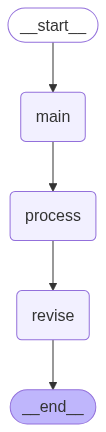

In [75]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [76]:
res=app.invoke({'message':'','code':''})
print('f',res)

i


ValueError: {'message': 'Provider returned error', 'code': 524, 'metadata': {'raw': 'error code: 524', 'provider_name': 'Targon'}}

In [ ]:
res=[HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='3f30e2f0-1b80-4628-a751-ecfe08cb0b60'), AIMessage(content='```python\nprint("Hello, World!")\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 36, 'total_tokens': 47, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'deepseek/deepseek-chat-v3-0324:free', 'system_fingerprint': None, 'id': 'gen-1754927618-oAPK1GAUwSwLWNeMM5HU', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--44145907-943c-4cb4-bf61-a3c78052531e-0', usage_metadata={'input_tokens': 36, 'output_tokens': 11, 'total_tokens': 47, 'input_token_details': {}, 'output_token_details': {}})]

In [ ]:
val=res[1].content
val=val.replace('\n','')
val=val.strip('`')
val=val[6:]
val

'print("Hello, World!")'